In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_df = pd.read_csv('../netstats/processed/netstats-threshold-0.5.csv', parse_dates=['date'])
original_df.head()

,date,density,global_cc
0,2020-04-15,0.295238,0.128254
1,2020-04-16,0.285714,0.116825
2,2020-04-17,0.209524,0.098413
3,2020-04-18,0.142857,0.101587
4,2020-04-19,0.123810,0.089524


In [47]:
comparsion_df = original_df.copy()
for threshold in [0.4, 0.6]:
    gittered_df = pd.read_csv(f'../netstats/processed/netstats-threshold-{threshold}.csv', parse_dates=['date'])
    comparsion_df = comparsion_df.merge(gittered_df, how='inner', on='date', suffixes=[None, f'_{threshold}'])
comparsion_df.head()

top_density = comparsion_df.nlargest(30, 'density_0.4')
print("Top 30 Dates with Highest Network Density:")
print(top_density[['date', 'density_0.4']])

# Identify the top 5 dates for clustering coefficient
top_clustering = comparsion_df.nlargest(30, 'global_cc_0.4')
print("\nTop 30 Dates with Highest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc_0.4']])

top_density = comparsion_df.nlargest(30, 'density')
print("Top 30 Dates with Highest Network Density:")
print(top_density[['date', 'density']])

# Identify the top 5 dates for clustering coefficient
top_clustering = comparsion_df.nlargest(30, 'global_cc')
print("\nTop 30 Dates with Highest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc']])

top_density = comparsion_df.nlargest(30, 'density_0.6')
print("Top 30 Dates with Highest Network Density:")
print(top_density[['date', 'density_0.6']])

# Identify the top 5 dates for clustering coefficient
top_clustering = comparsion_df.nlargest(30, 'global_cc_0.6')
print("\nTop 30 Dates with Highest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc_0.6']])

Top 30 Dates with Highest Network Density:
          date  density_0.4
0   2020-04-15     0.400000
1   2020-04-16     0.380952
2   2020-04-17     0.314286
3   2020-04-18     0.238095
6   2020-04-21     0.228571
4   2020-04-19     0.209524
5   2020-04-20     0.190476
36  2020-05-21     0.180952
7   2020-04-22     0.171429
8   2020-04-23     0.171429
9   2020-04-24     0.171429
33  2020-05-18     0.171429
35  2020-05-20     0.171429
39  2020-05-24     0.171429
43  2020-05-28     0.171429
44  2020-05-29     0.171429
126 2020-08-19     0.171429
128 2020-08-21     0.171429
234 2020-12-05     0.171429
34  2020-05-19     0.161905
38  2020-05-23     0.161905
41  2020-05-26     0.161905
48  2020-06-02     0.161905
49  2020-06-03     0.161905
233 2020-12-04     0.161905
237 2020-12-08     0.161905
241 2020-12-12     0.161905
32  2020-05-17     0.152381
37  2020-05-22     0.152381
40  2020-05-25     0.152381

Top 30 Dates with Highest Clustering Coefficient:
          date  global_cc_0.4
0   2020

In [66]:
word_bank = {
    pd.to_datetime('2020-04-15'): 'Mass testing',
    pd.to_datetime('2020-08-02'): '100k cases',
    pd.to_datetime('2020-09-11'): 'Signed Bayanihan to Recover act',
    pd.to_datetime('2021-01-05'): 'Alpha Variant',
    pd.to_datetime('2021-03-05'): 'Beta Variant'
}


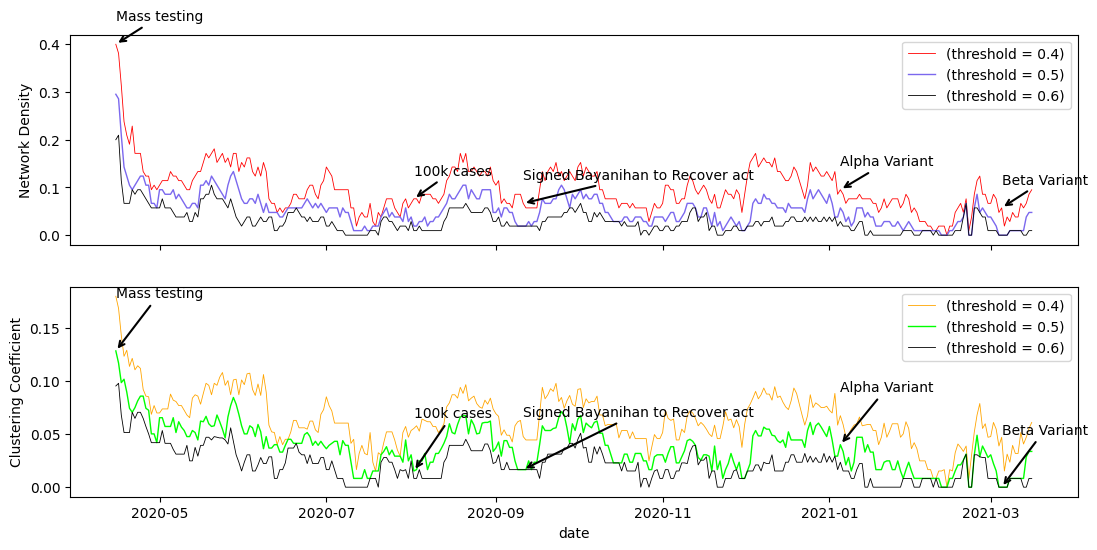

In [89]:
#fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10, 5))
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(13, 6))

#Plot Density
sns.lineplot(x='date', y='density_0.4', data=comparsion_df, ax=ax[0], color="red", linewidth=0.6, label="(threshold = 0.4)")
sns.lineplot(x='date', y='density', data=comparsion_df, ax=ax[0], color='mediumslateblue', linewidth=1, label="(threshold = 0.5)")
sns.lineplot(x='date', y='density_0.6', data=comparsion_df, ax=ax[0], color="black", linewidth=0.6, label="(threshold = 0.6)")
ax[0].set_ylabel('Network Density')

sns.lineplot(x='date', y='global_cc_0.4', data=comparsion_df, ax=ax[1], color='orange', linewidth=0.6, label="(threshold = 0.4)")
sns.lineplot(x='date', y='global_cc', data=comparsion_df, ax=ax[1], color='lime', linewidth=1, label="(threshold = 0.5)")
sns.lineplot(x='date', y='global_cc_0.6', data=comparsion_df, ax=ax[1], color='black', linewidth=0.6, label="(threshold = 0.6)")
ax[1].set_ylabel('Clustering Coefficient')


        # Annotate the graph with words from the word bank

# Annotate the graph for Clustering Coefficient with closer arrows
for date, annotation_text in word_bank.items():
    if date in comparsion_df['date'].values:  # Check if the date exists in the DataFrame
        plt.annotate(annotation_text, 
                     xy=(date, comparsion_df.loc[comparsion_df['date'] == date, 'global_cc'].values[0]), 
                     xytext=(date, comparsion_df.loc[comparsion_df['date'] == date, 'global_cc'].values[0] + 0.05),  # Closer offset for clustering coefficient
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # Arrow properties
                     fontsize=10,
                     color='black')
for date, annotation_text in word_bank.items():
    if date in comparsion_df['date'].values:  # Check if the date exists in the DataFrame
        ax[0].annotate(annotation_text, 
                        xy=(date, comparsion_df.loc[comparsion_df['date'] == date, 'density_0.4'].values[0]), 
                        xytext=(date, comparsion_df.loc[comparsion_df['date'] == date, 'density_0.4'].values[0] + 0.05),  # Closer offset for network density
                        arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # Arrow properties
                        fontsize=10,
                        color='black')

    
plt.savefig("../../graphs/Figure_02_2_Netstats-Sensitivity_Analysis.pdf", bbox_inches='tight')
plt.savefig("../../graphs/Figure_02_2_Netstats-Sensitivity_Analysis.png", bbox_inches='tight')
plt.show()

In [20]:
df = pd.read_csv('./../msvs/processed/msvs/gt.csv', parse_dates=['date'])

# Filter the DataFrame for the specified date range
start_date = pd.to_datetime('2020-04-15')
end_date = pd.to_datetime('2021-03-16')
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Cap values at 100
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].clip(upper=100)

# Identify the top 5 dates for network density
top_density = df_filtered.nlargest(5, 'density')
print("Top 5 Dates with Highest Network Density:")
print(top_density[['date', 'density']])

# Identify the top 5 dates for clustering coefficient
top_clustering = df_filtered.nlargest(5, 'global_cc')
print("\nTop 5 Dates with Highest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc']])

KeyError: 'density'